# **Deep Traffic**

### Phase1: Time Series analysis using LSTMs or other RNN variants for each of the separate junction. Each of the junction to get a separate *Temporal* Predictive Model; In the Phase 2 a spatio-temporal model shall be developed



In [1]:
##### Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import sklearn
import gc
import zipfile

In [3]:
##### Importing Dataset from Kaggle
! pip install -q kaggle

! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d utathya/smart-city-traffic-patterns

zip_obj = zipfile.ZipFile('/content/smart-city-traffic-patterns.zip','r')
zip_obj.extractall('./')
zip_obj.close()

  0% 0.00/339k [00:00<?, ?B/s]
100% 339k/339k [00:00<00:00, 50.4MB/s]


                     Junction  Vehicles           ID
DateTime                                            
2015-11-01 00:00:00         1        15  20151101001
2015-11-01 01:00:00         1        13  20151101011
2015-11-01 02:00:00         1        10  20151101021
2015-11-01 03:00:00         1         7  20151101031
2015-11-01 04:00:00         1         9  20151101041
...                       ...       ...          ...
2017-06-30 19:00:00         4        11  20170630194
2017-06-30 20:00:00         4        30  20170630204
2017-06-30 21:00:00         4        16  20170630214
2017-06-30 22:00:00         4        22  20170630224
2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 3 columns]
[1 1 1 ... 4 4 4] [15 13 10 ... 16 22 12]


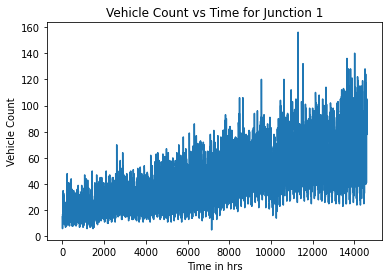

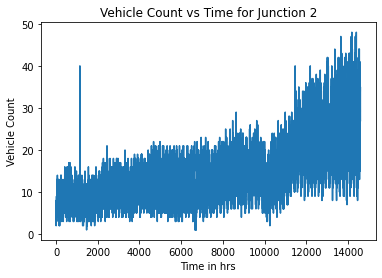

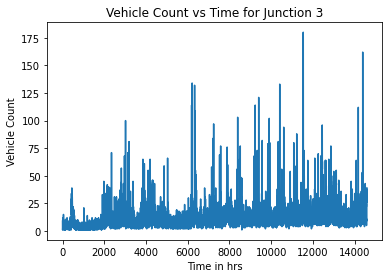

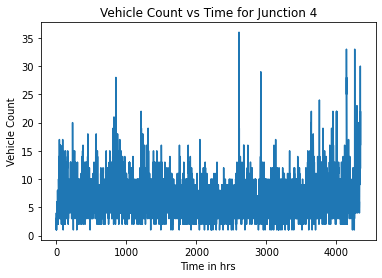

In [31]:
##### Loading Dataset

#### Reading Dataset
train = pd.read_csv('/content/train_aWnotuB.csv',index_col=0)
test = pd.read_csv('/content/test_BdBKkAj.csv',index_col=0)

print(train)
#print(test)

junc_data = (np.array(train['Junction']))
vehicle_data = (np.array(train['Vehicles']))

print(junc_data,vehicle_data)

num_features = 1 # Total Features used for temporal analysis ie. vehicular count

#### Data Extractor

def Data_Visualise(data_junction):
    """Function to visualise the data at a junction"""
    
    time_counter = []
    vehicle_counter = []
    
    i = 0
    
    for idx,item in enumerate(junc_data):
        if(item == data_junction):
            vehicle_counter.append(vehicle_data[idx])
            time_counter.append(i)
            i = i+1
            
    plt.plot(time_counter,vehicle_counter)
    plt.title('Vehicle Count vs Time for Junction '+ str(data_junction))
    plt.xlabel('Time in hrs')
    plt.ylabel('Vehicle Count')
    plt.show()
    
    return (vehicle_counter,time_counter)
    
veh_1,time_1 = Data_Visualise(1)
veh_2,time_2 = Data_Visualise(2)
veh_3,time_3 = Data_Visualise(3)    
veh_4,time_4 = Data_Visualise(4)    
    
def Data_Extract(veh_count):
    
    """Function to build a  processed dataset for vehicular count
       We will be predicting traffic in an Autoregressive Manner 
       Considering data of 2 hrs to predict that of 3rd hour
    """
    opt = []
    ipt = []
    
    for idx,item in enumerate(veh_count):
        if(idx <= len(veh_count)-3):
            ipt.append([veh_count[idx],veh_count[idx+1]])
            opt.append(veh_count[idx+2])
            
    return(np.array(ipt),np.array(opt))

ipt_junc1,opt_junc1 = Data_Extract(veh_1)
ipt_junc2,opt_junc2 = Data_Extract(veh_2)
ipt_junc3,opt_junc3 = Data_Extract(veh_3)
ipt_junc4,opt_junc4 = Data_Extract(veh_4)

#### Reshaping Inputs

def reshape_ipts(ipt_junc):
    """Function to reshape the Inputs in dims
    [Total Examples,Total Time Steps, Total Features]    
    """
    return(ipt_junc.reshape(ipt_junc.shape[0],ipt_junc.shape[1],num_features))

ipt_junc1 = reshape_ipts(ipt_junc1)
ipt_junc2 = reshape_ipts(ipt_junc2)
ipt_junc3 = reshape_ipts(ipt_junc3)
ipt_junc4 = reshape_ipts(ipt_junc4)

Epoch 1/150
456/456 [==============================] - 1s 2ms/step - loss: 2272.2139
Epoch 2/150
456/456 [==============================] - 1s 2ms/step - loss: 1873.9467
Epoch 3/150
456/456 [==============================] - 1s 2ms/step - loss: 1683.7390
Epoch 4/150
456/456 [==============================] - 1s 2ms/step - loss: 1519.4244
Epoch 5/150
456/456 [==============================] - 1s 2ms/step - loss: 1373.6312
Epoch 6/150
456/456 [==============================] - 1s 2ms/step - loss: 1242.3394
Epoch 7/150
456/456 [==============================] - 1s 2ms/step - loss: 1123.4736
Epoch 8/150
456/456 [==============================] - 1s 2ms/step - loss: 1015.9305
Epoch 9/150
456/456 [==============================] - 1s 2ms/step - loss: 918.5403
Epoch 10/150
456/456 [==============================] - 1s 2ms/step - loss: 830.0980
Epoch 11/150
456/456 [==============================] - 1s 2ms/step - loss: 749.8066
Epoch 12/150
456/456 [==============================] - 1s 2ms/ste

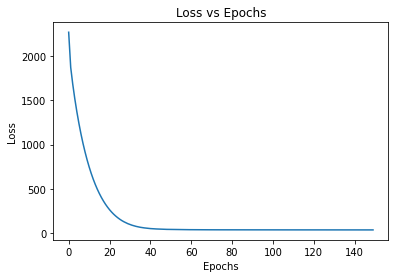

Epoch 1/150
456/456 [==============================] - 1s 2ms/step - loss: 190.3421
Epoch 2/150
456/456 [==============================] - 1s 2ms/step - loss: 115.5299
Epoch 3/150
456/456 [==============================] - 1s 2ms/step - loss: 85.3001
Epoch 4/150
456/456 [==============================] - 1s 2ms/step - loss: 66.0134
Epoch 5/150
456/456 [==============================] - 1s 2ms/step - loss: 52.5451
Epoch 6/150
456/456 [==============================] - 1s 2ms/step - loss: 42.7815
Epoch 7/150
456/456 [==============================] - 1s 2ms/step - loss: 35.5843
Epoch 8/150
456/456 [==============================] - 1s 2ms/step - loss: 30.1290
Epoch 9/150
456/456 [==============================] - 1s 2ms/step - loss: 25.9033
Epoch 10/150
456/456 [==============================] - 1s 2ms/step - loss: 22.4830
Epoch 11/150
456/456 [==============================] - 1s 2ms/step - loss: 19.6742
Epoch 12/150
456/456 [==============================] - 1s 2ms/step - loss: 17.3379

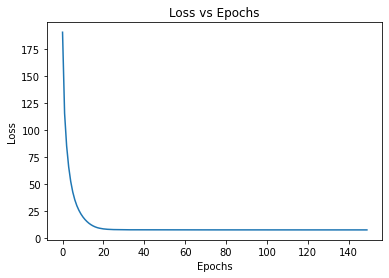

Epoch 1/150
456/456 [==============================] - 1s 2ms/step - loss: 248.4413
Epoch 2/150
456/456 [==============================] - 1s 2ms/step - loss: 175.1981
Epoch 3/150
456/456 [==============================] - 1s 2ms/step - loss: 145.9208
Epoch 4/150
456/456 [==============================] - 1s 2ms/step - loss: 123.2952
Epoch 5/150
456/456 [==============================] - 1s 2ms/step - loss: 100.4976
Epoch 6/150
456/456 [==============================] - 1s 2ms/step - loss: 87.5515
Epoch 7/150
456/456 [==============================] - 1s 2ms/step - loss: 78.2583
Epoch 8/150
456/456 [==============================] - 1s 2ms/step - loss: 71.1434
Epoch 9/150
456/456 [==============================] - 1s 2ms/step - loss: 65.5418
Epoch 10/150
456/456 [==============================] - 1s 2ms/step - loss: 61.0283
Epoch 11/150
456/456 [==============================] - 1s 2ms/step - loss: 57.3298
Epoch 12/150
456/456 [==============================] - 1s 2ms/step - loss: 54.2

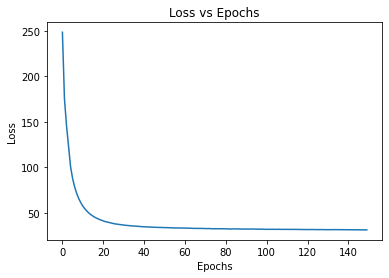

Epoch 1/150
136/136 [==============================] - 0s 2ms/step - loss: 55.9496
Epoch 2/150
136/136 [==============================] - 0s 2ms/step - loss: 42.1003
Epoch 3/150
136/136 [==============================] - 0s 2ms/step - loss: 32.9466
Epoch 4/150
136/136 [==============================] - 0s 2ms/step - loss: 27.1962
Epoch 5/150
136/136 [==============================] - 0s 2ms/step - loss: 19.7772
Epoch 6/150
136/136 [==============================] - 0s 2ms/step - loss: 13.8752
Epoch 7/150
136/136 [==============================] - 0s 2ms/step - loss: 12.4506
Epoch 8/150
136/136 [==============================] - 0s 2ms/step - loss: 11.7319
Epoch 9/150
136/136 [==============================] - 0s 2ms/step - loss: 11.0241
Epoch 10/150
136/136 [==============================] - 0s 2ms/step - loss: 10.3959
Epoch 11/150
136/136 [==============================] - 0s 2ms/step - loss: 9.9327
Epoch 12/150
136/136 [==============================] - 0s 2ms/step - loss: 9.5817
Epo

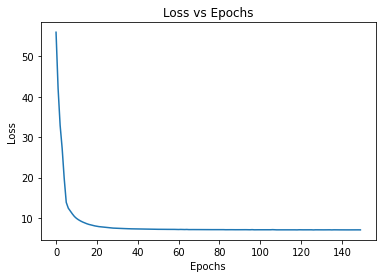

In [9]:
##### Training Forecasting Models

# Since, we are not considering correlations between spatial junctions we shall be having 4 different models for
# each of the 4 junctions

#### Function to train models

def train_model(ipt_junc,opt_junc,model_save_file):
    
    ### Defining the Model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(5,input_shape=(ipt_junc.shape[1],num_features)))
    model.add(tf.keras.layers.Dense(1,activation='relu'))
    
    ### Defining Callbacks
    checkpoint = tf.keras.callbacks.ModelCheckpoint(model_save_file,monitor='loss',save_best_only=True,mode='min')
    
    ### Compiling the Model
    model.compile(optimizer='adam',loss='mse')
    
    ### Fitting the Model
    history = model.fit(ipt_junc,opt_junc,epochs=150,batch_size=32,callbacks=checkpoint)
    
    ### Plotting Loss with Epochs
    plt.plot(history.history['loss'])
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    return(model)

#### Getting the Models for each junction

model_junc1 = train_model(ipt_junc1,opt_junc1,'model_junc1.hdf5')
model_junc2 = train_model(ipt_junc2,opt_junc2,'model_junc2.hdf5')
model_junc3 = train_model(ipt_junc3,opt_junc3,'model_junc3.hdf5')
model_junc4 = train_model(ipt_junc4,opt_junc4,'model_junc4.hdf5')

In [ ]:
#### Reloading Models

def reload_models(weights_file):
    
    """Function to reload model from saved weights"""
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(5,input_shape=(ipt_junc.shape[1],num_features)))
    model.add(tf.keras.layers.Dense(1,activation='relu'))
    
    model.load_weights(weights_file)
    model.compile(optimizer='adam',loss='mse')
    
    return(model)

model_junc1 = reload_model('')
model_junc2 = reload_model('')
model_junc3 = reload_model('')
model_junc4 = reload_model('')

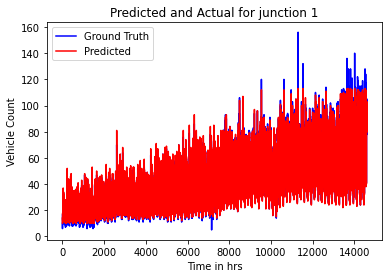

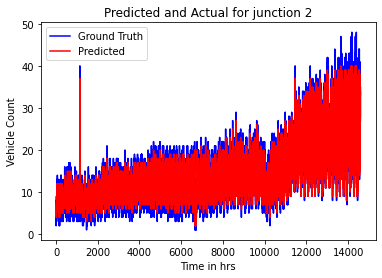

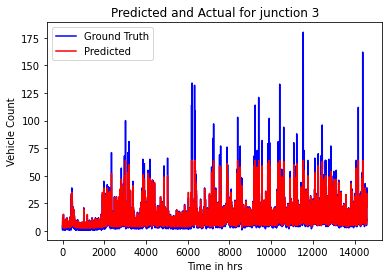

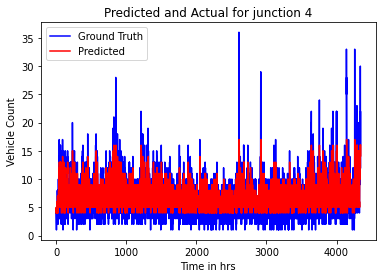

In [32]:
##### Predicting Forecast

def predict_forecast(model_junc,veh_count,ipt_junc,time_count,junction_idx):
    
    """Function for Forecast Traffic at a Junction"""
    
    forecast_junc = list(np.round(model_junc.predict(ipt_junc)))

    del(veh_count[0],veh_count[0])  # Deleting First two entries from Vehicle Count
    del(time_count[0],time_count[0]) # Deleting First two entries from Time Count
    time_count = list(np.array(time_count)-1)
    
    plt.plot(time_count,veh_count,label='Ground Truth',c='blue')
    plt.plot(time_count,forecast_junc,'--',label='Predicted',c='red')
    plt.title('Predicted and Actual for junction'+' ' +str(junction_idx))
    plt.xlabel('Time in hrs')
    plt.ylabel('Vehicle Count')
    plt.legend(loc='best')
    plt.show()
    
predict_forecast(model_junc1,veh_1,ipt_junc1,time_1,1)
predict_forecast(model_junc2,veh_2,ipt_junc2,time_2,2)
predict_forecast(model_junc3,veh_3,ipt_junc3,time_3,3)
predict_forecast(model_junc4,veh_4,ipt_junc4,time_4,4)